In [1]:
# Instalación librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
#es importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#algunos parámetros a Seaborn
sns.set(style="white", color_codes=True)

In [3]:
#knn vecino más cercano con la data de las plantas
plantas=pd.read_csv('./assets/plant_growth_data.csv')
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [4]:
tipos=plantas['Growth_Milestone'].unique()
tipos

array([0, 1])

In [5]:
plantas.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [6]:
#mirar las instancias en la columna target
tipos=plantas['Fertilizer_Type'].unique()
tipos

array(['chemical', 'organic', 'none'], dtype=object)

In [7]:
#reemplazo los valores categóricos por n
plantas['Fertilizer_Type'].replace(['chemical', 'organic','none'],[2, 1,0], inplace=True)


/var/folders/kr/066v09l56c9_4l91brw4fwdc0000gn/T/ipykernel_27123/502042334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  plantas['Fertilizer_Type'].replace(['chemical', 'organic','none'],[2, 1,0], inplace=True)
/var/folders/kr/066v09l56c9_4l91brw4fwdc0000gn/T/ipykernel_27123/502042334.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

In [8]:
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,2,31.719602,61.591861,0
1,sandy,4.033133,weekly,1,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,0,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,0,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,1,18.128741,63.625923,0


In [9]:
#contar cuántas por clase
plantas["Growth_Milestone"].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

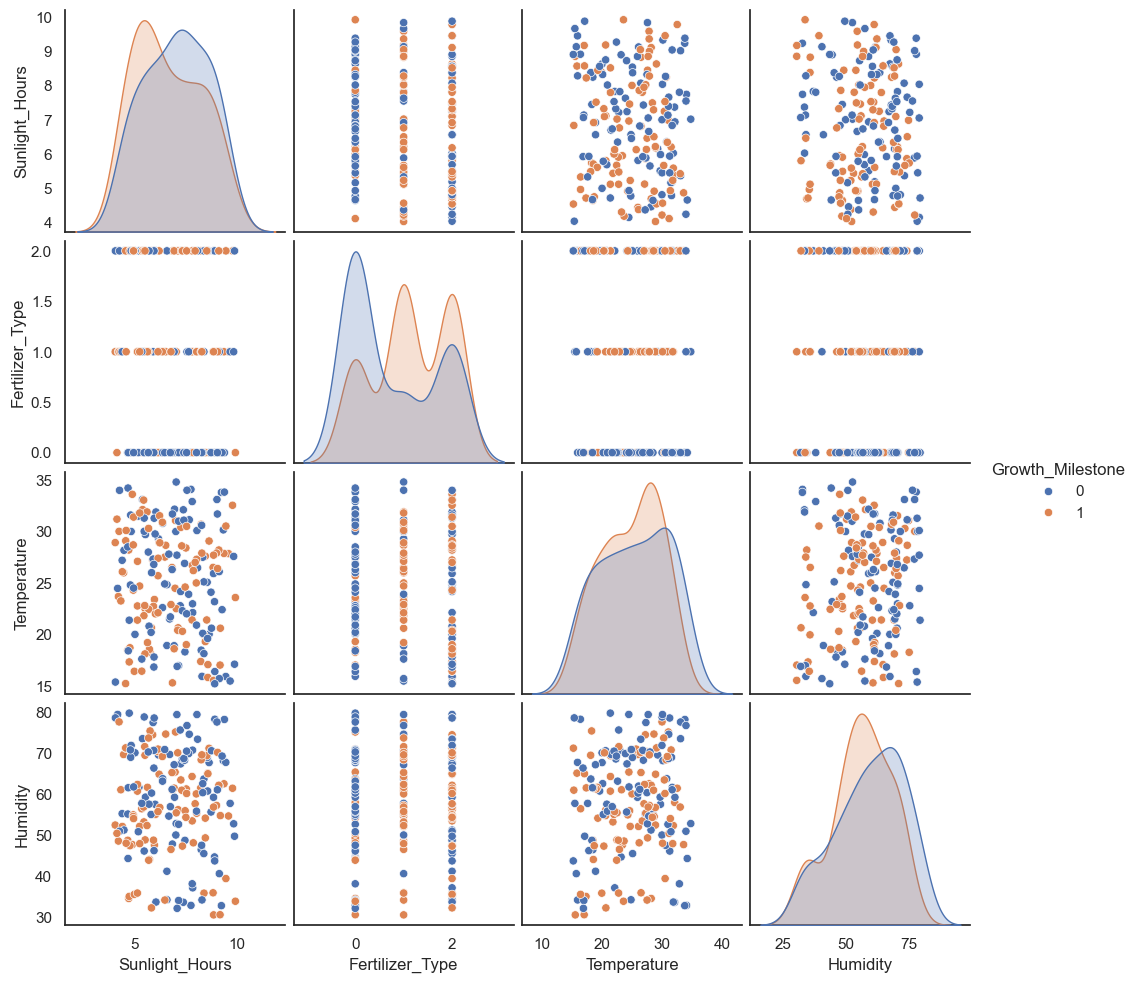

In [10]:
#separe las gráfica por la columna Target, dependiente
sns.pairplot(plantas, hue="Growth_Milestone")

In [11]:
#llamo al model de KNN
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#selecciono los atributos, luz, temperatura, y humedad
#X=plantas[['Soil_Type','Temperature','Humidity']]
#X=plantas[['Fertilizer_Type']]
X=plantas[['Humidity']]



#si la planta creció o no
y=plantas['Growth_Milestone']

In [13]:
#parto la data en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#coloco un k de 11
neigh= KNeighborsClassifier(n_neighbors=3)
#entreno el modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
#realizo la predicción
resultadoYtrain=neigh.predict(X_train)

In [16]:
#llamo a la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, resultadoYtrain)

array([[62, 18],
       [17, 57]])

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_train, resultadoYtrain))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78        80
           1       0.76      0.77      0.77        74

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.77      0.77      0.77       154



<function matplotlib.pyplot.show(close=None, block=None)>

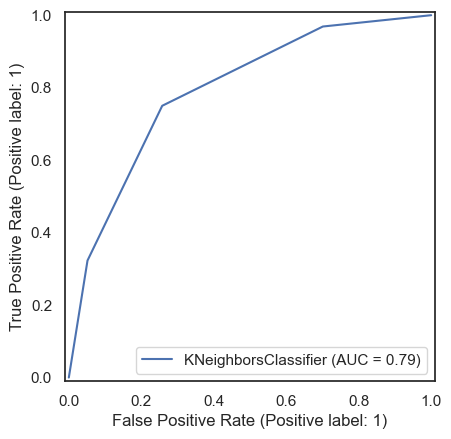

In [18]:
#se utiliza la Curva ROC
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
#displayRoc=RocCurveDisplay.from_estimator(model, X_test, y_test)
displayRoc=RocCurveDisplay.from_estimator(neigh, X, y)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

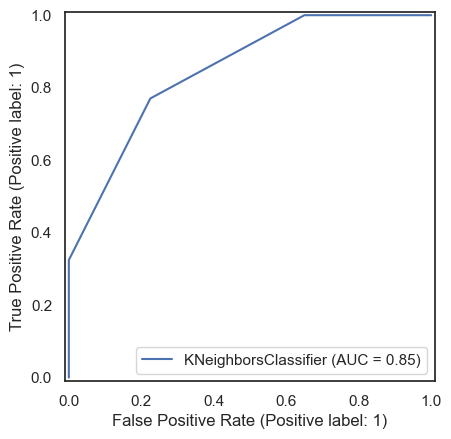

In [19]:
#curva de de Entrenamiento
#se utiliza la Curva ROC
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
displayRoc=RocCurveDisplay.from_estimator(neigh, X_train, y_train)

plt.show


In [20]:
#con la data de prueba
ypredTEst=neigh.predict(X_test)

In [21]:
confusion_matrix(y_test, ypredTEst)

array([[10,  7],
       [ 7, 15]])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypredTEst))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.68      0.68      0.68        22

    accuracy                           0.64        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.64      0.64      0.64        39



In [25]:
#datonuevo=[10,9,1,1]
datonuevo=[5.0]
datonuevo=np.array(datonuevo).reshape(-1,1)
resultado=neigh.predict(datonuevo)
resultado

/Users/sebastiancb/anaconda3/envs/env-talentotech-bootcamp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

Escalar datos
datos_con_estandar_scaler=preprocessing.StandardScaler().fit_transform(temporal)
datos_con_estandar_scaler

In [26]:
#escalado de los datos
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#estoy escalando los datos de entrenamiento
datos_con_estandar_scaler=preprocessing.StandardScaler().fit_transform(X_train)
datos_con_estandar_scaler

array([[ 0.0727723 ],
       [ 0.8238633 ],
       [ 0.91661736],
       [-1.86020444],
       [-0.80706219],
       [-2.13903501],
       [-0.11140677],
       [ 0.90888785],
       [ 1.53970255],
       [ 1.25773502],
       [ 0.79294528],
       [-0.75047392],
       [ 0.15139639],
       [-2.13594   ],
       [-0.73413208],
       [-0.25053785],
       [-0.54340102],
       [ 1.47796714],
       [-0.28145587],
       [-0.47650799],
       [-0.27904   ],
       [ 0.93980587],
       [ 0.26733896],
       [-0.84570972],
       [-0.56650827],
       [-1.85503728],
       [ 1.18715002],
       [ 1.62854627],
       [ 0.62181215],
       [-1.04972701],
       [-1.72870419],
       [ 0.13593738],
       [ 0.99598871],
       [ 0.19004391],
       [ 0.82056634],
       [ 0.20550292],
       [-1.90170303],
       [ 0.95526488],
       [-0.69111962],
       [-0.45923448],
       [-0.05912099],
       [-0.60609507],
       [ 0.22869144],
       [ 0.87634294],
       [ 1.6302036 ],
       [ 0

In [27]:
#coloco un k de 3, entreno el modelo con los datos "normalizados"
neigh= KNeighborsClassifier(n_neighbors=3)
#entreno el modelo
neigh.fit(datos_con_estandar_scaler, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
#realizo la predicción con datos normalizados
ypredNormalizado=neigh.predict(datos_con_estandar_scaler)

In [29]:
confusion_matrix(y_train, ypredNormalizado)

array([[62, 18],
       [17, 57]])

In [30]:
print(classification_report(y_train, ypredNormalizado))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        80
           1       0.76      0.77      0.77        74

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.77      0.77      0.77       154



<function matplotlib.pyplot.show(close=None, block=None)>

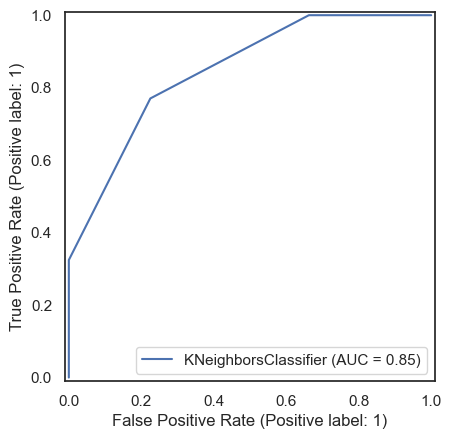

In [31]:
#curva ROC
displayRoc=RocCurveDisplay.from_estimator(neigh, datos_con_estandar_scaler, y_train)
plt.show